<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/logika_rozmyta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

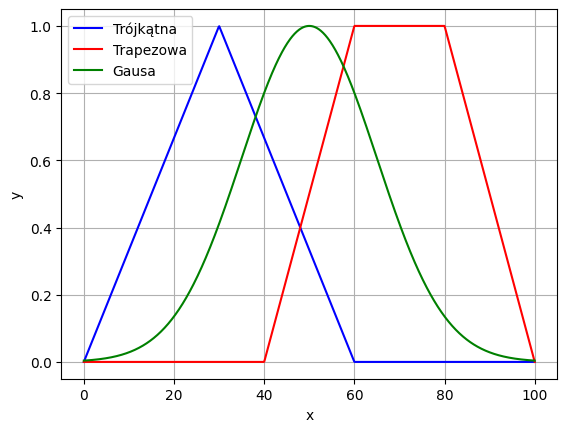

In [4]:
x = np.linspace(0, 100, 1000)# równomiernie rozkłada na osi x na początku losuje

trimf = fuzz.trimf(x, [0, 30, 60])
trapmf = fuzz.trapmf(x, [40, 60, 80, 100])
gaussmf = fuzz.gaussmf(x, mean=50, sigma=15)

plt.plot(x, trimf, 'b', linewidth=1.5, label='Trójkątna')
plt.plot(x, trapmf, 'r', linewidth=1.5, label='Trapezowa')
plt.plot(x, gaussmf, 'g', linewidth=1.5, label='Gausa')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

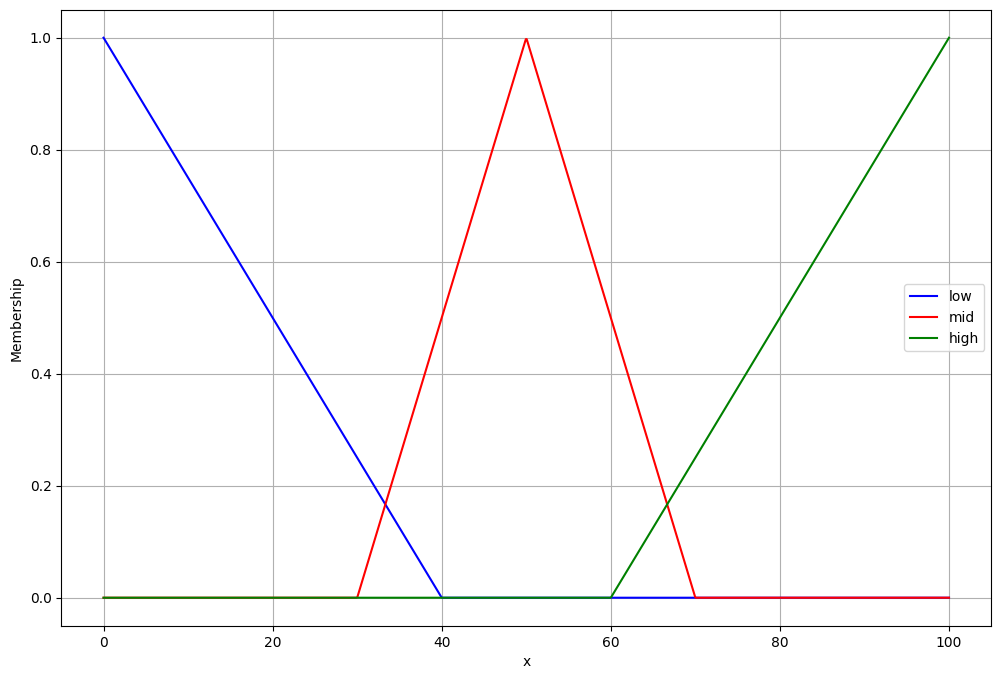

In [5]:
x = np.linspace(0, 100, 1000)# równomiernie rozkłada na osi x na początku losuje

trimfHP_low = fuzz.trimf(x, [0, 0, 40])
trimfHP_mid = fuzz.trimf(x, [30, 50, 70])
trimfHP_high = fuzz.trimf(x, [60, 100, 100])

plt.figure(figsize=(12, 8))

plt.plot(x, trimfHP_low, 'b', linewidth=1.5, label='low')
plt.plot(x, trimfHP_mid, 'r', linewidth=1.5, label='mid')
plt.plot(x, trimfHP_high, 'g', linewidth=1.5, label='high')

plt.xlabel('x')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.show()

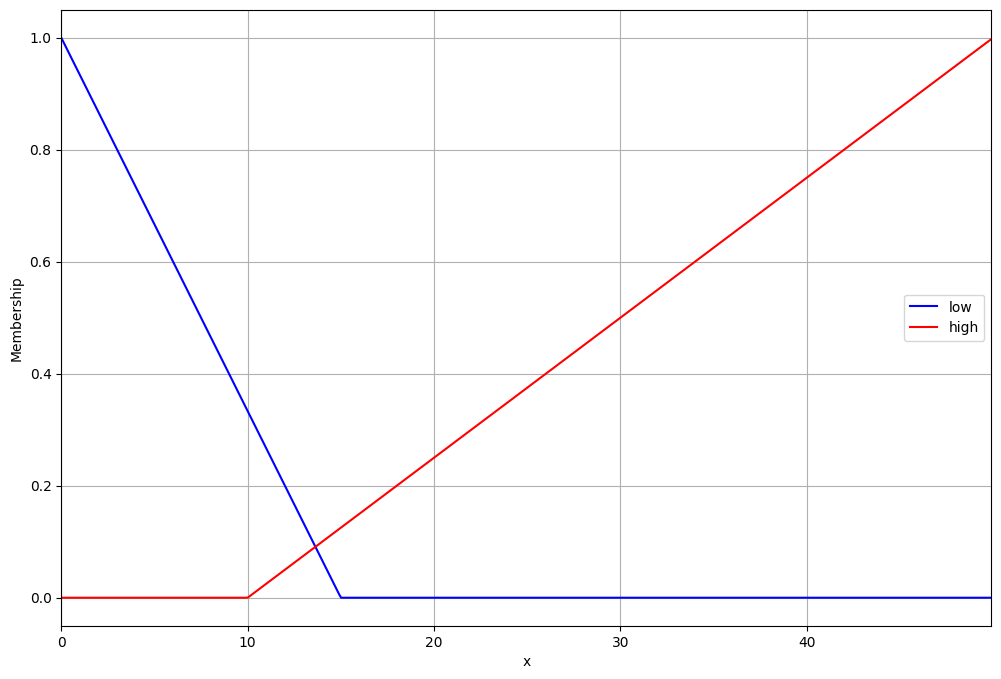

In [6]:
x = np.linspace(0, 100, 1000)# równomiernie rozkłada na osi x na początku losuje

trimfDis_low = fuzz.trimf(x, [0, 0, 15])
trimfDis_high = fuzz.trimf(x, [10, 50, 50])

plt.figure(figsize=(12, 8))

plt.plot(x, trimfDis_low, 'b', linewidth=1.5, label='low')
plt.plot(x, trimfDis_high, 'r', linewidth=1.5, label='high')

plt.xlabel('x')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.xlim(0,49.9)
plt.show()

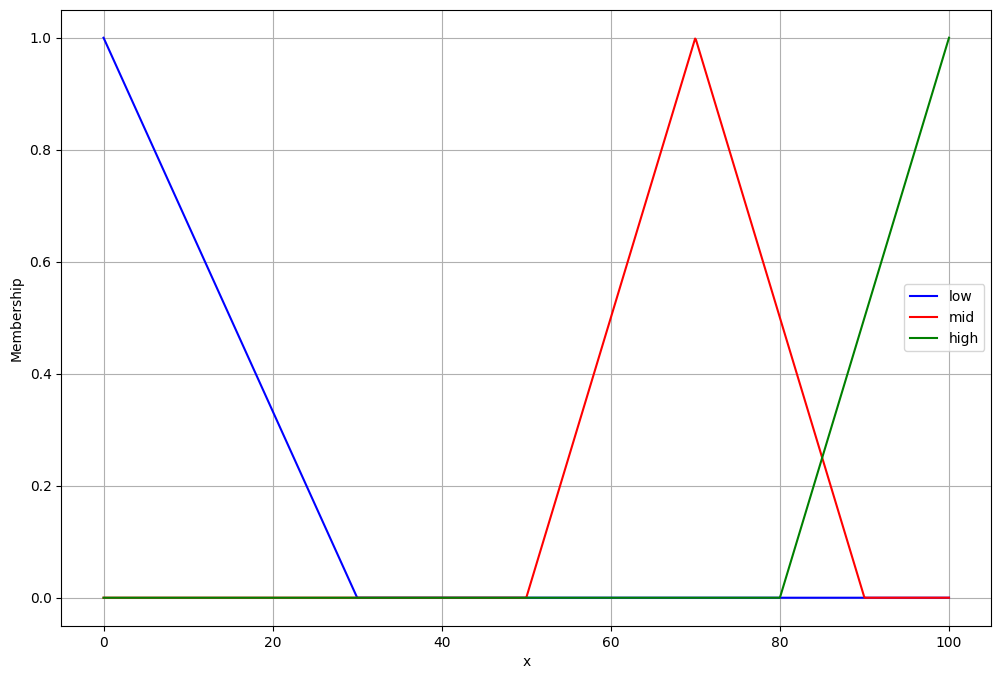

In [7]:
x = np.linspace(0, 100, 1000)

trimfATAK_brak = fuzz.trimf(x, [0, 0, 30])
trimfATAK_ostrożny = fuzz.trimf(x, [50, 70, 90])
trimfATAK_zdecydowany = fuzz.trimf(x, [80, 100, 100])

plt.figure(figsize=(12, 8))

plt.plot(x, trimfATAK_brak, 'b', linewidth=1.5, label='low')
plt.plot(x, trimfATAK_ostrożny, 'r', linewidth=1.5, label='mid')
plt.plot(x, trimfATAK_zdecydowany, 'g', linewidth=1.5, label='high')

plt.xlabel('x')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.show()

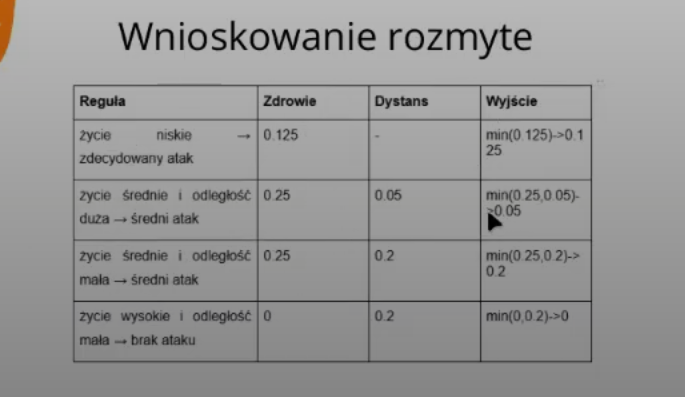

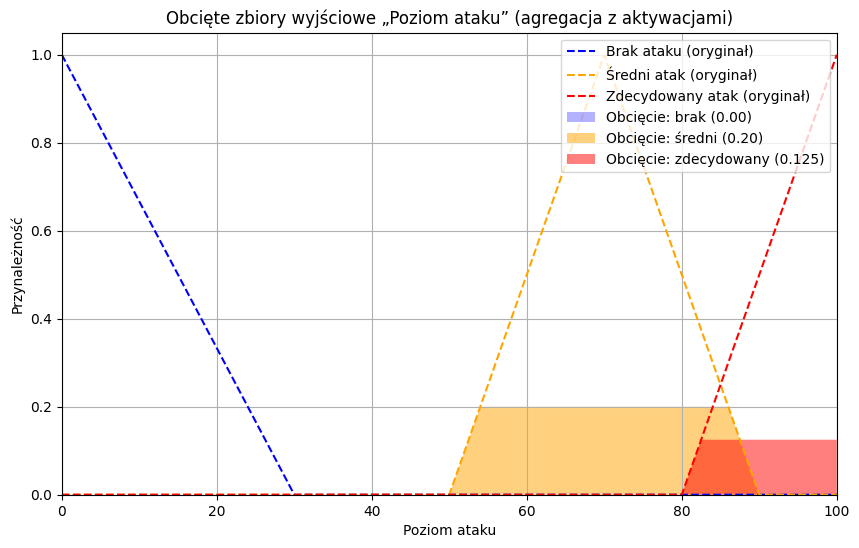

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# ================================
# 1. Definicja przestrzeni Uniwersum
# ================================
x = np.linspace(0, 100, 1000)

# ====================================================
# 2. Definicja trójkątnych funkcji przynależności „ATAK”
# ====================================================
#  - „brak ataku”
trimfATAK_brak = fuzz.trimf(x, [0,   0,  30])
#  - „średni atak”
trimfATAK_sredni = fuzz.trimf(x, [50, 70,  90])
#  - „zdecydowany atak”
trimfATAK_zdecydowany = fuzz.trimf(x, [80, 100, 100])

# ===============================================
# 3. Stopnie aktywacji reguł (na podstawie tabelki)
# ===============================================
r1 = 0.125 # Reguła 1: HP niskie → zdecydowany atak

r2 = 0.05 # Reguła 2: HP średnie i odległość duża → średni atak

r3 = 0.20 # Reguła 3: HP średnie i odległość mała → średni atak

r4 = 0.00 # Reguła 4: HP wysokie i odległość mała → brak ataku

# 3.1. Agregujemy stopnie dla każdego z trzech wyjściowych zbiorów
activation_brak        = r4                     # = 0.00
activation_sredni      = max(r2, r3)           # = max(0.05, 0.20) = 0.20
activation_zdecydowany = r1                     # = 0.125

# =================================
# 4. Przycinanie (min) funkcji „ATAK”
# =================================
cut_brak        = np.fmin(activation_brak,        trimfATAK_brak)
cut_sredni      = np.fmin(activation_sredni,      trimfATAK_sredni)
cut_zdecydowany = np.fmin(activation_zdecydowany, trimfATAK_zdecydowany)

# =========================================================
# 5. Agregacja – łączenie przyciętych zbiorów metodą max
# =========================================================
aggregated = np.fmax(cut_brak, np.fmax(cut_sredni, cut_zdecydowany))

# ============================================
# 6. Wykres: oryginalne krzywe i przycięte obszary
# ============================================
plt.figure(figsize=(10, 6))

# 6.1. Rysujemy oryginalne krzywe („ATAK” przed przycięciem)
plt.plot(x, trimfATAK_brak,        'b--',       linewidth=1.5, label='Brak ataku (oryginał)')
plt.plot(x, trimfATAK_sredni,      color='orange', linestyle='--', linewidth=1.5, label='Średni atak (oryginał)')
plt.plot(x, trimfATAK_zdecydowany, 'r--',       linewidth=1.5, label='Zdecydowany atak (oryginał)')

# 6.2. Wypełniamy przycięte obszary
plt.fill_between(x, 0, cut_brak,        facecolor='blue',   alpha=0.3, label='Obcięcie: brak (0.00)')
plt.fill_between(x, 0, cut_sredni,      facecolor='orange', alpha=0.5, label='Obcięcie: średni (0.20)')
plt.fill_between(x, 0, cut_zdecydowany, facecolor='red',    alpha=0.5, label='Obcięcie: zdecydowany (0.125)')

plt.title('Obcięte zbiory wyjściowe „Poziom ataku” (agregacja z aktywacjami)')
plt.xlabel('Poziom ataku')
plt.ylabel('Przynależność')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0, 1.05)
plt.xlim(0, 100)
plt.show()

Wynik defuzyfikacji (Atak): 73.9789


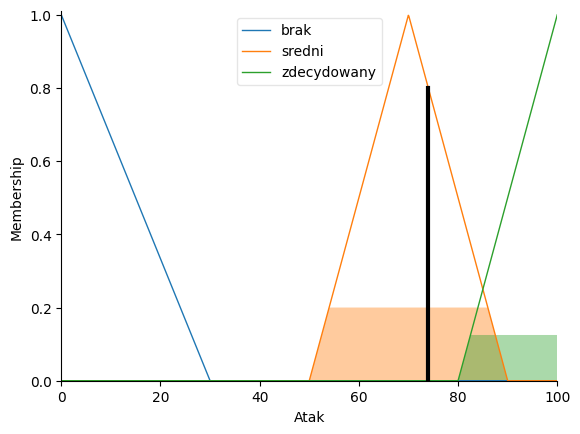

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# ======================================================
# 1. Definiujemy przestrzenie Uniwersum dla trzech zmiennych
#    (użyjemy 1000 punktów w każdym przedziale 0–100)
# ======================================================
x_HP = np.linspace(0, 100, 1000)
x_D  = np.linspace(0, 100, 1000)
x_A  = np.linspace(0, 100, 1000)

# ======================================================
# 2. Tworzymy obiekty rozmyte dla HP, Distance i Atak
# ======================================================
HP       = ctrl.Antecedent(x_HP, 'HP')
Distance = ctrl.Antecedent(x_D,  'Distance')
Atak     = ctrl.Consequent(x_A, 'Atak')

# ======================================================
# 3. Definicja funkcji przynależności dla HP („Zdrowie”)
# ======================================================
HP['low']  = fuzz.trimf(x_HP, [0,   0,  40])
HP['mid']  = fuzz.trimf(x_HP, [30, 50,  70])
HP['high'] = fuzz.trimf(x_HP, [60, 100, 100])

# ======================================================
# 4. Definicja funkcji przynależności dla Distance („Odległość”)
# ======================================================
Distance['low']  = fuzz.trimf(x_D, [0,  0,  15])
Distance['high'] = fuzz.trimf(x_D, [10, 50, 50])

# ======================================================
# 5. Definicja funkcji przynależności dla Atak (wyjście)
# ======================================================
Atak['brak']      = fuzz.trimf(x_A, [0,   0,  30])
Atak['sredni']    = fuzz.trimf(x_A, [50,  70,  90])
Atak['zdecydowany'] = fuzz.trimf(x_A, [80, 100, 100])

# ======================================================
# 6. Tworzymy reguły dokładnie takie, jakie były w tabeli:
#    Reguła 1: HP low          --> Atak zdecydowany
#    Reguła 2: HP mid AND Distance high --> Atak średni
#    Reguła 3: HP mid AND Distance low  --> Atak średni
#    Reguła 4: HP high AND Distance low --> Atak brak
# ======================================================
rule1 = ctrl.Rule(HP['low'], Atak['zdecydowany'])
rule2 = ctrl.Rule(HP['mid'] & Distance['high'], Atak['sredni'])
rule3 = ctrl.Rule(HP['mid'] & Distance['low'],  Atak['sredni'])
rule4 = ctrl.Rule(HP['high'] & Distance['low'], Atak['brak'])

# ======================================================
# 7. Tworzymy system rozmyty (control system) i symulator
# ======================================================
atak_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
atak_sim  = ctrl.ControlSystemSimulation(atak_ctrl)

# ======================================================
# 8. Podajemy konkretne wartości wejściowe (HP=35, Distance=12)
#    które dają dokładnie stopnie przynależności:
#    - HP_low=0.125, HP_mid=0.25, HP_high=0
#    - Dist_low=0.20, Dist_high=0.05
# ======================================================
atak_sim.input['HP']       = 35
atak_sim.input['Distance'] = 12

# ======================================================
# 9. Przeprowadzamy obliczenie (fuzzfikacja, wnioskowanie, defuzyfikacja)
# ======================================================
atak_sim.compute()

# ======================================================
# 10. Odczytujemy wynik defuzyfikacji:
# ======================================================
print(f"Wynik defuzyfikacji (Atak): {atak_sim.output['Atak']:.4f}")

# Jeśli chcemy zbudować wykres finalnego rozkładu przynależności i zaznaczyć punkt defuzyfikacji:
final = atak_sim.output['Atak']
Atak.view(sim=atak_sim)  # rysuje MF Atak oraz pionową kreskę w miejscu final
